### 1\. Write a function that converts number representation (bin<->dec<->hex)

In [87]:
# from various representation to int representation
def hex_to_int(n_hex):
    n = 0
    for i,c in zip(range(len(n_hex)-2),n_hex[:1:-1]):
        try :
            base = int(c)
        except:
            base = ord(c)-97+10 ## proper traslation on ascii code of c character
            
        n += base*16**i
    
    return n


def dec_to_int(n_dec):
    n = 0
    for i,c in zip(range(len(n_dec)),n_dec[::-1]):
        n += int(c)*10**i
    
    return n

def bin_to_int(n_bin):
    n = 0
    for i,c in zip(range(len(n_bin)-2),n_bin[:1:-1]):
        n += int(c)*2**i
    
    return n

n = 44294
n_hex = hex(n)
n_dec = str(n)
n_bin = bin(n)

print(hex_to_int(n_hex) == n)
print(dec_to_int(n_dec) == n)
print(bin_to_int(n_bin) == n)

True
True
True


In [88]:
# from int representation to various representations

def int_to_char(n):
    if(n<10):
        return str(n)
    else:
        if(n==10):
            return 'a'
        elif(n==11):
            return 'b'
        elif(n==12):
            return 'c'
        elif(n==13):
            return 'd'
        elif(n==14):
            return 'e'
        elif(n==15):
            return 'f'
        else:
            print('{}-->ERROR_unimplementted_base'.format(n))

def int_to_bin(n):
    B = 2 # base of target representation
    n_B = '0b'
    I=1
    while( (n%(B**I))!=n ):
        I += 1
    I -= 1
    for i in range(I,-1,-1):
        n_B += int_to_char( (n-n%(B**i))//B**i )
        n %= (B**i) # scrematura
    
    return n_B
        
def int_to_dec(n):
    B = 10 # base of target representation
    n_B = ''
    I=1
    while( (n%(B**I))!=n ):
        I += 1
    I -= 1
    for i in range(I,-1,-1):
        n_B += int_to_char( n//B**i )
        n %= (B**i) # scrematura
    
    return n_B

def int_to_hex(n):
    B = 16 # base of target representation
    n_B = '0x'
    I=1
    while( (n%(B**I))!=n ):
        I += 1
    I -= 1
    for i in range(I,-1,-1):
        n_B += int_to_char( n//B**i )
        n %= (B**i) # scrematura
    return n_B

n = 44294

print(int_to_hex(n) == hex(n))
print(int_to_dec(n) == str(n))
print(int_to_bin(n) == bin(n))

True
True
True


In [94]:
def bin_to_dec(n_bin):
    return int_to_dec(bin_to_int(n_bin))
def dec_to_bin(n_dec):
    return int_to_bin(dec_to_int(n_dec))
def hex_to_dec(n_hex):
    return int_to_dec(hex_to_int(n_hex))
def dec_to_hex(n_dec):
    return int_to_hex(dec_to_int(n_dec))

n = 1234
n_bin = bin(n)
n_dec = int_to_dec(n)
n_hex = hex(n)

print( bin_to_dec(n_bin) == n_dec )
print( dec_to_bin(n_dec) == n_bin )
print( hex_to_dec(n_hex) == n_dec )
print( dec_to_hex(n_dec) == n_hex )

True
True
True
True


### 2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [351]:
def sequence():
    from numpy import random
    return ''.join([str(round(random.uniform())) for n in range(0,32)])

In [352]:
def floating_point(bit_sequence):
    significant = bit_sequence[0:23]
    exponent = bin_to_int('0b'+bit_sequence[23:31])
    sign = (-1)**dec_to_int(bit_sequence[31])
    
    fraction = 1
    for i,b in zip(range(len(significant)),significant):
        fraction+= int(b)*2.**(23-i)
    
    return sign * 2.**(exponent-127.) * fraction # IEEE 754 single-precision binary floating-point format, from wiki

for i in range(15):
    print(floating_point(sequence()))

-0.014156416989862919
-1.6414116528841333e+27
580408639488.0
6119907393536.0
0.0033583613112568855
-6.058135700900208e+31
-1.0396777941303296e+16
-1.0733911022130393e-24
2.7818457341160534e+42
5.4511542320251465
2.6824423571270017e-08
-5.028935577340672e-26
-11028.7001953125
7.025701887810819e+24
-1.4545133906446224e+36


### 3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [353]:
testval = 1.

i=0
overflow = False
while overflow != True:
    try:
        testval*2**i
    except:
        print("overflow with i={}".format(i))
        overflow = True
    i+=1
        
i=0
underflow = False
while underflow != True:
    try:
        testval/2**(i)
    except:
        print("underflow with i={}".format(i))
        underflow = True
    i+=1
        
                

overflow with i=1024
underflow with i=1024


### 4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 3) to an original variable and check the point where the two are the same 

In [354]:
# machine precision upon comparison depends on base vaue
def rough_machine_precision(value):
    original = value
    
    epsilon = 1

    i=0
    test = original + epsilon
    while original != test:
        epsilon /= 2**i 
        test = original + epsilon
        i += 1
    
    print("original =",original, "\tepsilon =", epsilon, "\tequality =",original==test, "\tfraction =", epsilon/original )
    

rough_machine_precision(0.00019)
rough_machine_precision(1502)
rough_machine_precision(1.22*10**14)
rough_machine_precision(10**6)

original = 0.00019 	epsilon = 1.3552527156068805e-20 	equality = True 	fraction = 7.132909029509897e-17
original = 1502 	epsilon = 2.842170943040401e-14 	equality = True 	fraction = 1.8922576185355532e-17
original = 122000000000000.0 	epsilon = 0.0009765625 	equality = True 	fraction = 8.004610655737704e-18
original = 1000000 	epsilon = 1.4551915228366852e-11 	equality = True 	fraction = 1.455191522836685e-17


### 5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

In [15]:
from math import sqrt,log10
def quad_sol(a,b,c):
    return (  (-b+sqrt(b**2-4*a*c) )/(2*a),   (-b-sqrt(b**2-4*a*c) )/(2*a)  )

def sol_test(a,b,c,x0):
    return a*x0**2+b*x0+c

def der(a,b,c,x):
    return 2*a*x+b

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

In [22]:
a = 0.001
b = 1000
c = 0.001

x0 = quad_sol(a,b,c)
print("sol1 =",x0[0],"\tsol test =",sol_test(a,b,c,x0[0]))
print("sol2 =",x0[1],"\tsol test =",sol_test(a,b,c,x0[1]))
der(a,b,c,x0[0]),der(a,b,c,x0[1])

sol1 = -9.999894245993346e-07 	sol test = 1.0575401665491313e-08
sol2 = -999999.999999 	sol test = 7.247924804689582e-08


(999.999999998, -999.999999998)

Solution seems pretty good considering that the modulus of the derivative in corrispondence of the zeros is $\sim 1000$.

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

In [40]:
Xp = (-b+sqrt(b**2-4*a*c) )
Xm = (-b-sqrt(b**2-4*a*c) )

def quad_sol2(a,b,c):
    #return (  (( (-b-sqrt(b**2-4*a*c) )*(-b+sqrt(b**2-4*a*c) )  ))/((   (2*a)*(-b-sqrt(b**2-4*a*c) )   )),   (( (-b-sqrt(b**2-4*a*c) )*(-b+sqrt(b**2-4*a*c) ) ))/(( (2*a)*(-b+sqrt(b**2-4*a*c) ) ))  )
    return (-2*c/(b+sqrt(b**2-4*a*c)),-2*c/(b-sqrt(b**2-4*a*c)))

x0 = quad_sol2(a,b,c)
print("sol- =",x0[0],"\tsol test =",sol_test(a,b,c,x0[0]))
print("sol+ =",x0[1],"\tsol test =",sol_test(a,b,c,x0[1]))

b**2,4*a*c

sol- = -1.000000000001e-06 	sol test = 0.0
sol+ = -1000010.5755125057 	sol test = 10575.62534720993


(1000000, 4e-06)

The critical point in the calculation is the "discriminant", in which an operation like $10^6-10^{-6}$ is present. As seen in the ex4) floating point numbers in python (on the system from which I am writing) have something like 17 decades of precision. If I modify a $10^6$ number by subtracting a $10^{-6}$ number I am effectively truncating the small number after $17-(6+6)=5$ significant digits.

 * In the $(+)$ solution, the truncated part is left naked and propagating the error the overall accuracy of the result drops to $5$ significant digits, as we consistently observe in the obtained solution. The problem arises since the derivative of the function is in the order of $10^3$, and the solution is asound $X=-10^6$. In this situation an error on the $6^{th}$ digit wheights a $\Delta x\simeq 10$, which produces a $\Delta y\simeq 10^4$, which probably can be considered a lot differenf from $0$, but this still depends on the context.

 * On the $(-)$ solution instead, the truncated part is left into the last significant digits and overall precision remains around $12$ digits. 

(c) write a function that compute the roots of a quadratic equation accurately in all cases

I'm not shure but it seems that standard implementation works quite good actually.

### 6\. Write a program that implements the function $f(x)=x(x−1)$

In [43]:
f = lambda x : x*(x-1)

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

In [44]:
Df = lambda x : 2*x-1
def Df_(x,dx):
    return (f(x+dx)-f(x))/dx

print("analitic =",Df(1),"\tnumeric =",Df_(1,10**-2))

analitic = 1 	numeric = 1.010000000000001


Most significant problem is the fact that $10^{-2}$ represents only a limited convengence of the limit.

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [45]:
dX = [10**-4,10**-6,10**-8,10**-10,10**-12,10**-14]

for dx in dX:
    print("analitic =",Df(1),"\tnumeric =",Df_(1,dx),"\trelative_variation =",abs(Df(1)-Df_(1,dx)))

analitic = 1 	numeric = 1.0000999999998899 	relative_variation = 9.999999988985486e-05
analitic = 1 	numeric = 1.0000009999177333 	relative_variation = 9.99917733279787e-07
analitic = 1 	numeric = 1.0000000039225287 	relative_variation = 3.922528746258536e-09
analitic = 1 	numeric = 1.000000082840371 	relative_variation = 8.284037100736441e-08
analitic = 1 	numeric = 1.0000889005833413 	relative_variation = 8.890058334132256e-05
analitic = 1 	numeric = 0.9992007221626509 	relative_variation = 0.0007992778373491216


Initially, accuracy improves with smaller $\delta$. After a certain point accuracy decreases with decreasing $\delta$.


The first behaviour comes from the fact that in principle a smaller $\delta$ better represents the limit for $\delta\rightarrow 0$. The second behaviour comes form the fact that a smaller $\delta$ also induces a bigger truncation error which at a certain poit takes the lead.

### 7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?


In [60]:
from math import sqrt,pi

f = lambda x: sqrt(1-x**2)

def Integral(N):
    h = 2/N
    return (sum(f(-1+i*h) for i in range(0,N)) + 0.5*(f(-1)+f(1)) )*h

def rel_diff(N):
    return abs(0.5*pi-Integral(N))/(0.5*pi)

print("(N=100 case) relative difference with respect to true result =", rel_diff(100) )

(N=100 case) relative difference with respect to true result = 0.0010581074180623477



(b) How much can $N$ be increased if the computation needs to be run in less than a second?

In [55]:
%timeit Integral(100)
%timeit Integral(1000)
%timeit Integral(10000)

38.3 µs ± 723 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
372 µs ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.74 ms ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can see that the timing scale linearily with $N$. Which means that to do $1000$ times the integration with $N=10000$ I will need almost four seconds, so that with $N=2.5\times 10^6$ the computation should run for roughly one second.

In [57]:
%timeit Integral(int(2.5e6))

1.1 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
print("N=10 -->\t rel_diff=",rel_diff(10))
print("N=100 -->\t rel_diff=",rel_diff(100))
print("N=1000 -->\t rel_diff=",rel_diff(1000))
print("N=10000 -->\t rel_diff=",rel_diff(10000))

N=10 -->	 rel_diff= 0.033277332943462204
N=100 -->	 rel_diff= 0.0010581074180623477
N=1000 -->	 rel_diff= 3.34787476444498e-05
N=10000 -->	 rel_diff= 1.0587493629051964e-06


exponent = -1.4994772248164552


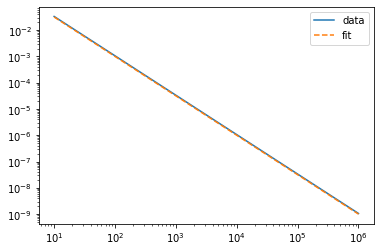

In [103]:
N = [10,100,1000,10000,100000,1000000]
rd = [rel_diff(n) for n in N]
fit = [n**(-1.5) for n in N]
plt.plot(N,rd,label="data")
plt.plot(N,fit,linestyle="--",label="fit")
plt.xscale("log")
plt.yscale("log")
plt.legend()

from math import log
exponent = (log(rd[-1])-log(rd[0]))/(log(N[-1])-log(N[0]))
print("exponent =", exponent)

b') What is the gain in running it for 1 minute?

Assuming the linear time relation holds, 1 minute computation amounts to 60 one second computations which roughly correspond to $N = 1.5\times 10^{8}$, which exploiting the relation previously derived would amout to a relative presision of $\sim 10^{-8}$. This precision will be reached only if the roundup errors do not become dominant.